In [1]:
# Import statements here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest

In [2]:
# Read in data into new dataframe
df = pd.read_csv("/Users/hariaksha/Documents/GitHub/gdpr/data/welle120_aufbereitet.csv")

In [3]:
# Filter out rows with empty values in specific columns
columns = ['erf_speich', 'si_speich', 'erf_intern', 'si_intern', 'erf_extunt', 'si_extunt', 'erf_forsch', 
                  'si_forsch', 'a_rsicher', 'pdwichtig', 'a_nachteil', 'a_gefahr', 'a_kompliz', 'a_vorteil', 
                  'a_vertrau', 'a_inno', 'a_kost', 'a_berat', 'a_proz', 'a_stand', 'a_ki', 'a_forsch', 'a_nachteil', 
                  'aufwand', 'datengm', 'umheute', 'nach', 'ums', 'pers', 'nache', 'umse', 'perse']
df_clean = df.dropna(subset=columns)
print(df_clean.head())
print(df_clean.tail())

       ums    nach    pers    umse   nache   perse  pdwichtig  umheute  \
5   runter  runter  gleich  runter  runter  runter        3.0      4.0   
6     hoch    hoch    hoch  gleich  gleich    hoch        5.0      5.0   
7   gleich  gleich  gleich  gleich  gleich  gleich        5.0      4.0   
11  gleich    hoch  gleich    hoch    hoch  gleich        2.0      5.0   
13  runter  runter  runter  runter  runter  gleich        5.0      4.0   

    aspekte  aufwand  ...  br_zahl               br08   bges      gk9    gk4  \
5       2.0      2.0  ...      5.0          UBeratung  395.0  250-499  >=100   
6       2.0      3.0  ...      1.0  IKT-Dienstleister   46.0    20-49  20-99   
7       2.0      3.0  ...      2.0          ReSteuWip   23.0    20-49  20-99   
11      2.0      3.0  ...      1.0  IKT-Dienstleister   31.0    20-49  20-99   
13      3.0      3.0  ...      1.0             techDL   50.0    50-99  20-99   

       aweight  online      vg                            br04  \
5    11.

**Descriptive Statistics**\
In the following code block, we find the following descriptive statistics to describe the sample:
* standard deviation
* sample size
* minimum
* maximum
* median

We also find the following inferential statistics to make inferences about the general population:
* confidence interval upper and lower bounds
    * Note that a 95% confidence interval indicates that there is a 95% chance that the true population mean is in that interval. This does not mean that 95% of the population is in this interval.

In [4]:
column_of_interest = 'a_inno'
# Display basic statistics for the column of interest
print(f"Descriptive statistics for {column_of_interest}:")
print(df_clean[column_of_interest].describe())
print("Skew:\t", df_clean[column_of_interest].skew())

# Display confidence interval for the column of interest
print(stats.norm.interval(confidence = 0.95, loc = df_clean[column_of_interest].mean(), scale = (df_clean[column_of_interest].std()/np.sqrt(df_clean[column_of_interest].count()))))

Descriptive statistics for a_inno:
count    637.000000
mean       2.800628
std        1.258730
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: a_inno, dtype: float64
Skew:	 0.08126898813046148
(np.float64(2.702879222748146), np.float64(2.898376664222027))


**Hypothesis Testing**

In [5]:
column_of_interest = 'a_inno'
column_of_interest2 = 'a_kost'

# Perform one-sample z-test
mean_null_hypothesis = 3  # Hypothesized population mean
result = ztest(df_clean[column_of_interest], value=mean_null_hypothesis)
print(f"The test statistic (z-score) and p-value for the one-sample z-test on {column_of_interest} with null hypothesis mean {mean_null_hypothesis} are: {result[0]} and {result[1]}")

print(f"Means of {column_of_interest} and {column_of_interest2}: {df_clean[column_of_interest].mean()} and {df_clean[column_of_interest2].mean()}")

# Perform two-sample z-test
mean_null_hypothesis = 3  # Hypothesized population mean
result = ztest(df_clean[column_of_interest], df_clean[column_of_interest2], value=mean_null_hypothesis)
print(f"The test statistic (z-score) and p-value for the two-sample z-test on {column_of_interest} and {column_of_interest2} are: {result[0]} and {result[1]}")


The test statistic (z-score) and p-value for the one-sample z-test on a_inno with null hypothesis mean 3 are: -3.9976180490845152 and 6.398308403064917e-05
Means of a_inno and a_kost: 2.8006279434850865 and 3.660910518053375
The test statistic (z-score) and p-value for the two-sample z-test on a_inno and a_kost are: -54.20895278572889 and 0.0


**Create Uniform or Normal Random Simulation Sampling Distributions**

In [6]:
column_of_interest = 'a_inno'
sample = np.random.uniform(low=1.0, high=5.0, size=1000)
sample = np.random.normal(loc=df_clean[column_of_interest].mean(), scale=df_clean[column_of_interest].std(), size=1000)

a_inno
3.0    213
1.0    133
2.0    111
4.0    110
5.0     70
Name: count, dtype: int64
a_inno
3.0    33.437991
1.0    20.879121
2.0    17.425432
4.0    17.268446
5.0    10.989011
Name: proportion, dtype: float64
Average response for a_inno: 2.8006279434850865


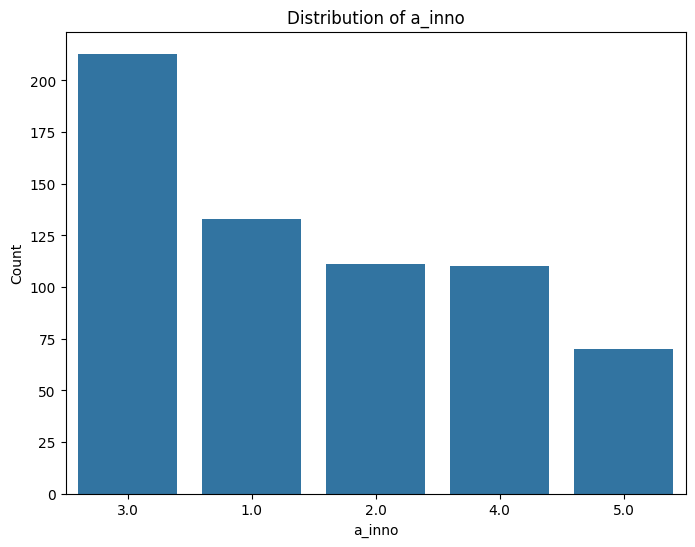

In [7]:
# Get counts in table and percentage format
column_of_interest = 'a_inno'
print(df_clean[column_of_interest].value_counts())
print(df_clean[column_of_interest].value_counts(normalize=True) * 100)

# Get average response for column
average_response = df_clean[column_of_interest].mean()
print(f"Average response for {column_of_interest}: {average_response}")

# Create a bar plot for the one column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x=column_of_interest, order=df_clean[column_of_interest].value_counts().index)
plt.title('Distribution of ' + column_of_interest)
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.show()

In [8]:
# Show total number of rows in dataframe
print(f"Total number of rows in cleaned dataframe: {len(df_clean)}")

Total number of rows in cleaned dataframe: 637


**Recoding Variables**

We need to recode most variables to binary variables (0/1).
* The variables ums, umse, nach, nache, pers, and perse each have responses of increasing (), same (gleich), or decreasing (gefallen); they will be used to create new variables such as umsgleich and nachegesunken, which are respectively 1 if the ums response is 'gleich' or if the nache response is 'gesunken'.
* The other variables, for example kund_dat, all either have responses from one to four or one to five; they wll be used to create new variables such as kund_dat2, kund_dat3, kund_dat4 and kund_dat5, kund_dat23, and kund_dat45.
* Note that the responses of 'increasing' and '1' for all variables have not been encoded. This is because these variables wll be included or carried in the intercept in any regression, and they therefore do not need to be explicitly encoded.

This recoding will allow us to do multivariable binary logistic regression.

In [14]:
# recode variables / create binary data variables for high certainty for 4 situational questions (si_speich, si_intern, si_extunt, si_forsch)
df_clean['sicher_speich_binary'] = df_clean['si_speich'] > 3
df_clean['sicher_intern_binary'] = df_clean['si_intern'] > 3
df_clean['sicher_extunt_binary'] = df_clean['si_extunt'] > 3
df_clean['sicher_forsch_binary'] = df_clean['si_forsch'] > 3

df_clean['sicher_speich_certainty_and_yes'] = (df_clean['sicher_speich_binary'] == 1) & (df_clean['erf_speich'] == 1)
df_clean['sicher_intern_certainty_and_yes'] = (df_clean['sicher_intern_binary'] == 1) & (df_clean['erf_intern'] == 1)
df_clean['sicher_extunt_certainty_and_yes'] = (df_clean['sicher_extunt_binary'] == 1) & (df_clean['erf_extunt'] == 1)
df_clean['sicher_forsch_certainty_and_yes'] = (df_clean['sicher_forsch_binary'] == 1) & (df_clean['erf_forsch'] == 1)

# recode the agreement questions
df_clean['a_positiv_zustimmung'] = df_clean['a_positiv'] > 3
df_clean['a_rsicher_zustimmung'] = df_clean['a_rsicher'] > 3
df_clean['a_gefahr_zustimmung'] = df_clean['a_gefahr'] > 3
df_clean['a_aufwand_zustimmung'] = df_clean['a_aufwand'] > 3
df_clean['a_kompliz_zustimmung'] = df_clean['a_kompliz'] > 3
df_clean['a_gefahr_zustimmung'] = df_clean['a_gefahr'] > 3
df_clean['a_vorteil_zustimmung'] = df_clean['a_vorteil'] > 3
df_clean['a_vertrau_zustimmung'] = df_clean['a_vertrau'] > 3
df_clean['a_inno_zustimmung'] = df_clean['a_inno'] > 3
df_clean['a_kost_zustimmung'] = df_clean['a_kost'] > 3
df_clean['a_berat_zustimmung'] = df_clean['a_berat'] > 3
df_clean['a_proz_zustimmung'] = df_clean['a_proz'] > 3
df_clean['a_stand_zustimmung'] = df_clean['a_stand'] > 3
df_clean['a_ki_zustimmung'] = df_clean['a_ki'] > 3
df_clean['a_forsch_zustimmung'] = df_clean['a_forsch'] > 3
df_clean['a_nachteil_zustimmung'] = df_clean['a_nachteil'] > 3

# create binary variable to see if firm has high certainty in all scenarios
df_clean['always_high_certainty'] = (df_clean['si_speich'] > 3) & (df_clean['si_intern'] > 3) & (df_clean['si_extunt'] > 3) & (df_clean['si_forsch'] > 3)

# create binary variable for if firm has high certainty (4 or 5) on average
df_clean['avg_high_certainty'] = df_clean['si_speich'] + df_clean['si_intern'] + df_clean['si_extunt'] + df_clean['si_forsch'] >= 16

# use dummy coding to create new binary variables for pdwichtig
df_clean['pdwichtig2'] = df_clean['pdwichtig'] == 2
df_clean['pdwichtig3'] = df_clean['pdwichtig'] == 3
df_clean['pdwichtig4'] = df_clean['pdwichtig'] == 4
df_clean['pdwichtig5'] = df_clean['pdwichtig'] == 5

df_clean['pdwichtig23'] = df_clean['pdwichtig'].isin([2, 3])
df_clean['pdwichtig45'] = df_clean['pdwichtig'].isin([4, 5])

# use dummy coding to create new binary variables for aufwand
df_clean['aufwand2'] = df_clean['aufwand'] == 2
df_clean['aufwand3'] = df_clean['aufwand'] == 3
df_clean['aufwand4'] = df_clean['aufwand'] == 4

# use dummy coding to create new binary variables for kund_dat
df_clean['kund_dat2'] = df_clean['kund_dat'] == 2
df_clean['kund_dat3'] = df_clean['kund_dat'] == 3
df_clean['kund_dat4'] = df_clean['kund_dat'] == 4
df_clean['kund_dat5'] = df_clean['kund_dat'] == 5

df_clean['kund_dat23'] = df_clean['kund_dat'].isin([2, 3])
df_clean['kund_dat45'] = df_clean['kund_dat'].isin([4, 5])

# use dummy coding to create new binary variables for datengm
df_clean['datengm2'] = df_clean['datengm'] == 2
df_clean['datengm3'] = df_clean['datengm'] == 3
df_clean['datengm4'] = df_clean['datengm'] == 4
df_clean['datengm5'] = df_clean['datengm'] == 5

df_clean['datengm23'] = df_clean['datengm'].isin([2, 3])
df_clean['datengm45'] = df_clean['datengm'].isin([4, 5])

# use dummy coding to create new binary variables for umheute
df_clean['umheute2'] = df_clean['umheute'] == 2
df_clean['umheute3'] = df_clean['umheute'] == 3
df_clean['umheute4'] = df_clean['umheute'] == 4
df_clean['umheute5'] = df_clean['umheute'] == 5

df_clean['umheute23'] = df_clean['umheute'].isin([2, 3])
df_clean['umheute45'] = df_clean['umheute'].isin([4, 5])

# use dummy coding to create new binary variables for ums
df_clean['umsgleich'] = df_clean['ums'] == "gleich"
df_clean['umsgesunken'] = df_clean['ums'] == "runter"

# use dummy coding to create new binary variables for nach
df_clean['nachgleich'] = df_clean['nach'] == "gleich"
df_clean['nachgesunken'] = df_clean['nach'] == "runter"

# use dummy coding to create new binary variables for pers
df_clean['persgleich'] = df_clean['pers'] == "gleich"
df_clean['persgesunken'] = df_clean['pers'] == "runter"

# use dummy coding to create new binary variables for umse
df_clean['umsegleich'] = df_clean['umse'] == "gleich"
df_clean['umsegesunken'] = df_clean['umse'] == "runter"

# use dummy coding to create new binary variables for nache
df_clean['nachegleich'] = df_clean['nache'] == "gleich"
df_clean['nachegesunken'] = df_clean['nache'] == "runter"

# use dummy coding to create new binary variables for perse
df_clean['persegleich'] = df_clean['perse'] == "gleich"
df_clean['persegesunken'] = df_clean['perse'] == "runter"

# use dummy coding to create new binary variables for a_positiv
df_clean['a_positiv2'] = df_clean['a_positiv'] == 2
df_clean['a_positiv3'] = df_clean['a_positiv'] == 3
df_clean['a_positiv4'] = df_clean['a_positiv'] == 4
df_clean['a_positiv5'] = df_clean['a_positiv'] == 5

df_clean['a_positiv23'] = df_clean['a_positiv'].isin([2, 3])
df_clean['a_positiv45'] = df_clean['a_positiv'].isin([4, 5])

# use dummy coding to create new binary variables for a_rsicher
df_clean['a_rsicher2'] = df_clean['a_rsicher'] == 2
df_clean['a_rsicher3'] = df_clean['a_rsicher'] == 3
df_clean['a_rsicher4'] = df_clean['a_rsicher'] == 4
df_clean['a_rsicher5'] = df_clean['a_rsicher'] == 5

df_clean['a_rsicher23'] = df_clean['a_rsicher'].isin([2, 3])
df_clean['a_rsicher45'] = df_clean['a_rsicher'].isin([4, 5])

# use dummy coding to create new binary variables for a_gefahr
df_clean['a_gefahr2'] = df_clean['a_gefahr'] == 2
df_clean['a_gefahr3'] = df_clean['a_gefahr'] == 3
df_clean['a_gefahr4'] = df_clean['a_gefahr'] == 4
df_clean['a_gefahr5'] = df_clean['a_gefahr'] == 5

df_clean['a_gefahr23'] = df_clean['a_gefahr'].isin([2, 3])
df_clean['a_gefahr45'] = df_clean['a_gefahr'].isin([4, 5])

# use dummy coding to create new binary variables for a_aufwand
df_clean['a_aufwand2'] = df_clean['a_aufwand'] == 2
df_clean['a_aufwand3'] = df_clean['a_aufwand'] == 3
df_clean['a_aufwand4'] = df_clean['a_aufwand'] == 4
df_clean['a_aufwand5'] = df_clean['a_aufwand'] == 5

df_clean['a_aufwand23'] = df_clean['a_aufwand'].isin([2, 3])
df_clean['a_aufwand45'] = df_clean['a_aufwand'].isin([4, 5])

# use dummy coding to create new binary variables for a_kompliz
df_clean['a_kompliz2'] = df_clean['a_kompliz'] == 2
df_clean['a_kompliz3'] = df_clean['a_kompliz'] == 3
df_clean['a_kompliz4'] = df_clean['a_kompliz'] == 4
df_clean['a_kompliz5'] = df_clean['a_kompliz'] == 5

df_clean['a_kompliz23'] = df_clean['a_kompliz'].isin([2, 3])
df_clean['a_kompliz45'] = df_clean['a_kompliz'].isin([4, 5])

# use dummy coding to create new binary variables for a_vorteil
df_clean['a_vorteil2'] = df_clean['a_vorteil'] == 2
df_clean['a_vorteil3'] = df_clean['a_vorteil'] == 3
df_clean['a_vorteil4'] = df_clean['a_vorteil'] == 4
df_clean['a_vorteil5'] = df_clean['a_vorteil'] == 5

df_clean['a_vorteil23'] = df_clean['a_vorteil'].isin([2, 3])
df_clean['a_vorteil45'] = df_clean['a_vorteil'].isin([4, 5])

# use dummy coding to create new binary variables for a_vertrau
df_clean['a_vertrau2'] = df_clean['a_vertrau'] == 2
df_clean['a_vertrau3'] = df_clean['a_vertrau'] == 3
df_clean['a_vertrau4'] = df_clean['a_vertrau'] == 4
df_clean['a_vertrau5'] = df_clean['a_vertrau'] == 5

df_clean['a_vertrau23'] = df_clean['a_vertrau'].isin([2, 3])
df_clean['a_vertrau45'] = df_clean['a_vertrau'].isin([4, 5])

# use dummy coding to create new binary variables for a_inno
df_clean['a_inno2'] = df_clean['a_inno'] == 2
df_clean['a_inno3'] = df_clean['a_inno'] == 3
df_clean['a_inno4'] = df_clean['a_inno'] == 4
df_clean['a_inno5'] = df_clean['a_inno'] == 5

df_clean['a_inno23'] = df_clean['a_inno'].isin([2, 3])
df_clean['a_inno45'] = df_clean['a_inno'].isin([4, 5])

# use dummy coding to create new binary variables for a_kost
df_clean['a_kost2'] = df_clean['a_kost'] == 2
df_clean['a_kost3'] = df_clean['a_kost'] == 3
df_clean['a_kost4'] = df_clean['a_kost'] == 4
df_clean['a_kost5'] = df_clean['a_kost'] == 5

df_clean['a_kost23'] = df_clean['a_kost'].isin([2, 3])
df_clean['a_kost45'] = df_clean['a_kost'].isin([4, 5])

# use dummy coding to create new binary variables for a_berat
df_clean['a_berat2'] = df_clean['a_berat'] == 2
df_clean['a_berat3'] = df_clean['a_berat'] == 3
df_clean['a_berat4'] = df_clean['a_berat'] == 4
df_clean['a_berat5'] = df_clean['a_berat'] == 5

df_clean['a_berat23'] = df_clean['a_berat'].isin([2, 3])
df_clean['a_berat45'] = df_clean['a_berat'].isin([4, 5])

# use dummy coding to create new binary variables for a_proz
df_clean['a_proz2'] = df_clean['a_proz'] == 2
df_clean['a_proz3'] = df_clean['a_proz'] == 3
df_clean['a_proz4'] = df_clean['a_proz'] == 4
df_clean['a_proz5'] = df_clean['a_proz'] == 5

df_clean['a_proz23'] = df_clean['a_proz'].isin([2, 3])
df_clean['a_proz45'] = df_clean['a_proz'].isin([4, 5])

# use dummy coding to create new binary variables for a_stand
df_clean['a_stand2'] = df_clean['a_stand'] == 2
df_clean['a_stand3'] = df_clean['a_stand'] == 3
df_clean['a_stand4'] = df_clean['a_stand'] == 4
df_clean['a_stand5'] = df_clean['a_stand'] == 5

df_clean['a_stand23'] = df_clean['a_stand'].isin([2, 3])
df_clean['a_stand45'] = df_clean['a_stand'].isin([4, 5])

# use dummy coding to create new binary variables for a_ki
df_clean['a_ki2'] = df_clean['a_ki'] == 2
df_clean['a_ki3'] = df_clean['a_ki'] == 3
df_clean['a_ki4'] = df_clean['a_ki'] == 4
df_clean['a_ki5'] = df_clean['a_ki'] == 5

df_clean['a_ki23'] = df_clean['a_ki'].isin([2, 3])
df_clean['a_ki45'] = df_clean['a_ki'].isin([4, 5])

# use dummy coding to create new binary variables for a_forsch
df_clean['a_forsch2'] = df_clean['a_forsch'] == 2
df_clean['a_forsch3'] = df_clean['a_forsch'] == 3
df_clean['a_forsch4'] = df_clean['a_forsch'] == 4
df_clean['a_forsch5'] = df_clean['a_forsch'] == 5

df_clean['a_forsch23'] = df_clean['a_forsch'].isin([2, 3])
df_clean['a_forsch45'] = df_clean['a_forsch'].isin([4, 5])

# use dummy coding to create new binary variables for a_nachteil
df_clean['a_nachteil2'] = df_clean['a_nachteil'] == 2
df_clean['a_nachteil3'] = df_clean['a_nachteil'] == 3
df_clean['a_nachteil4'] = df_clean['a_nachteil'] == 4
df_clean['a_nachteil5'] = df_clean['a_nachteil'] == 5

df_clean['a_nachteil23'] = df_clean['a_nachteil'].isin([2, 3])
df_clean['a_nachteil45'] = df_clean['a_nachteil'].isin([4, 5])

# turn the erf variables to 0s and 1s instead of 1s and 2s
df_clean['erf_extunt'] = df_clean['erf_extunt'] == 1
df_clean['erf_intern'] = df_clean['erf_intern'] == 1
df_clean['erf_forsch'] = df_clean['erf_forsch'] == 1
df_clean['erf_speich'] = df_clean['erf_speich'] == 1

/var/folders/55/dqmn2ngx28xd2c95p7r6b9bm0000gn/T/ipykernel_1118/1314144935.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['persegesunken'] = df_clean['perse'] == "runter"
/var/folders/55/dqmn2ngx28xd2c95p7r6b9bm0000gn/T/ipykernel_1118/1314144935.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['a_positiv2'] = df_clean['a_positiv'] == 2
/var/folders/55/dqmn2ngx28xd2c95p7r6b9bm0000gn/T/ipykernel_1118/1314144935.py:103: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

In [15]:
# Chi-Squared Test
contingency_table = pd.crosstab(df_clean['sicher_speich_binary'], df_clean['erf_speich'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared: 20.587089694694157
p-value: 5.6979071627376425e-06
Degrees of freedom: 1
Expected frequencies:
 [[ 38.93877551 195.06122449]
 [ 67.06122449 335.93877551]]


**Segmentation**

erf_speich,False,True
si_speich,,
1.0,2.666667,2.928571
2.0,3.500000,2.612903
3.0,2.794872,2.658915
4.0,2.680000,2.848485
5.0,2.428571,2.895833


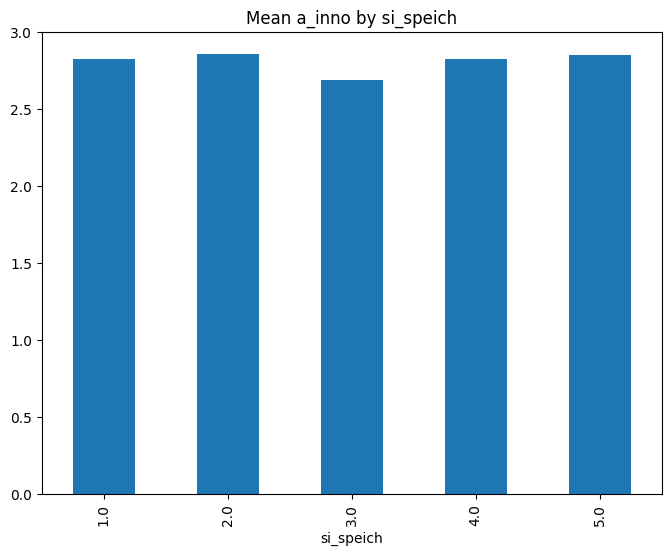

In [16]:
column_of_interest = 'si_speich'
grouped = df_clean.groupby(column_of_interest)
grouped['a_inno'].mean().plot(kind='bar', figsize=(8, 6))
plt.title(f'Mean a_inno by {column_of_interest}')

df_clean.pivot_table(index='si_speich', columns='erf_speich', values='a_inno', aggfunc='mean')

**See Correlations**

Useful to identify most predictive features or independent variables before creating any regression model. This is the Pearson correlation coefficient, which makes it only useful for linear association.

   a_positiv  a_rsicher  a_gefahr
0        1.0        2.0       1.0
1        1.0        1.0       1.0
2        3.0        3.0       3.0
3        2.0        2.0       3.0
4        1.0        2.0       2.0


<Axes: title={'center': 'Correlation Matrix Dataset'}>

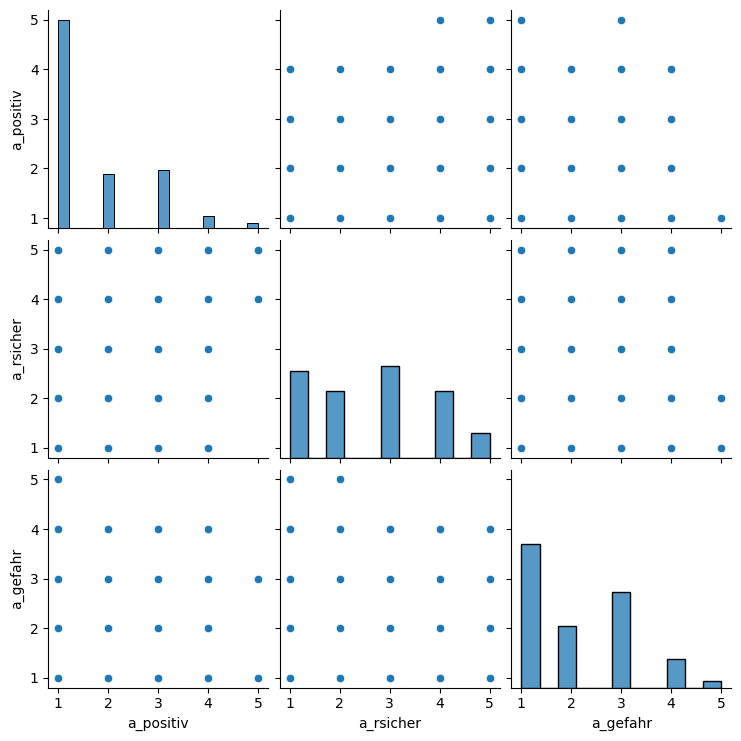

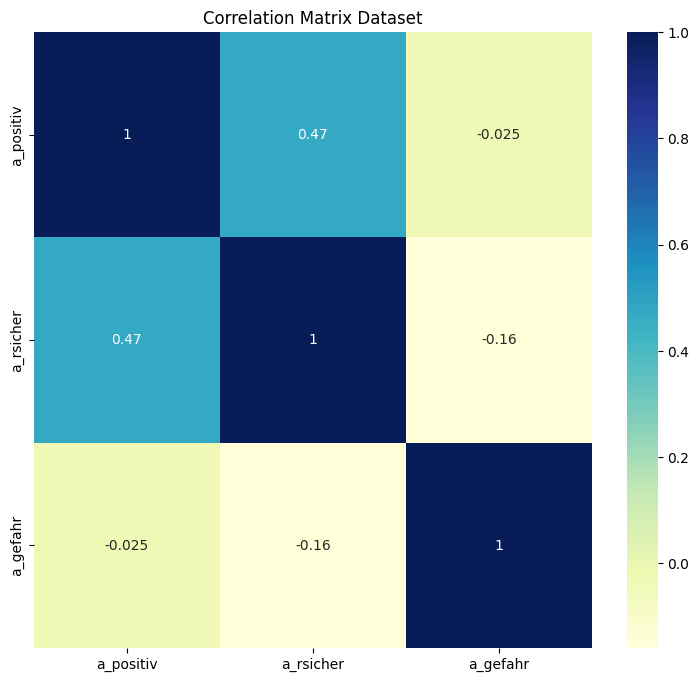

In [17]:
# Seaborn scatterplots can be useful to make scatter plots
columns = ['a_positiv', 'a_rsicher', 'a_gefahr']

sns.pairplot(df_clean[columns]) # see all possible scatter plots

df[columns].corr() # see all correlation coefficients for cols that you want

print(df[columns].head()) 
plt.figure(figsize=(9,8))
plt.title("Correlation Matrix Dataset")
sns.heatmap(df[columns].corr(), color="k", annot=True, cmap="YlGnBu") # correlation matrix

**Create Logistic Regression Models**

In [ ]:
# start

**Test Logistic Regression Models**

In [ ]:
# start